<a href="https://colab.research.google.com/github/Ahmed-Shatla/Unsupervised-Basic-model/blob/main/unsupervised%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/sparks/Iris.csv')
data
X,y = data.iloc[:,:-1],data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#check Nulls

In [3]:
X.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [4]:
X=X.drop(['Id'],axis=1)
X=X.iloc[:,:].values


In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=1)
  model.fit(X)
  wcss.append(model.inertia_)

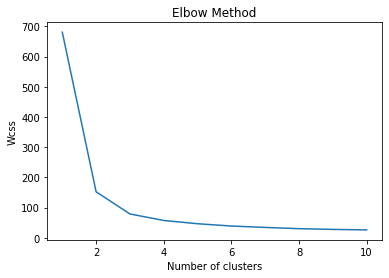

In [7]:
plt.plot(range(1,11,1),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [8]:
model = KMeans(n_clusters=3,init='k-means++',random_state=1)
model.fit(X)

KMeans(n_clusters=3, random_state=1)

In [9]:
y_pred = model.fit_predict(X)

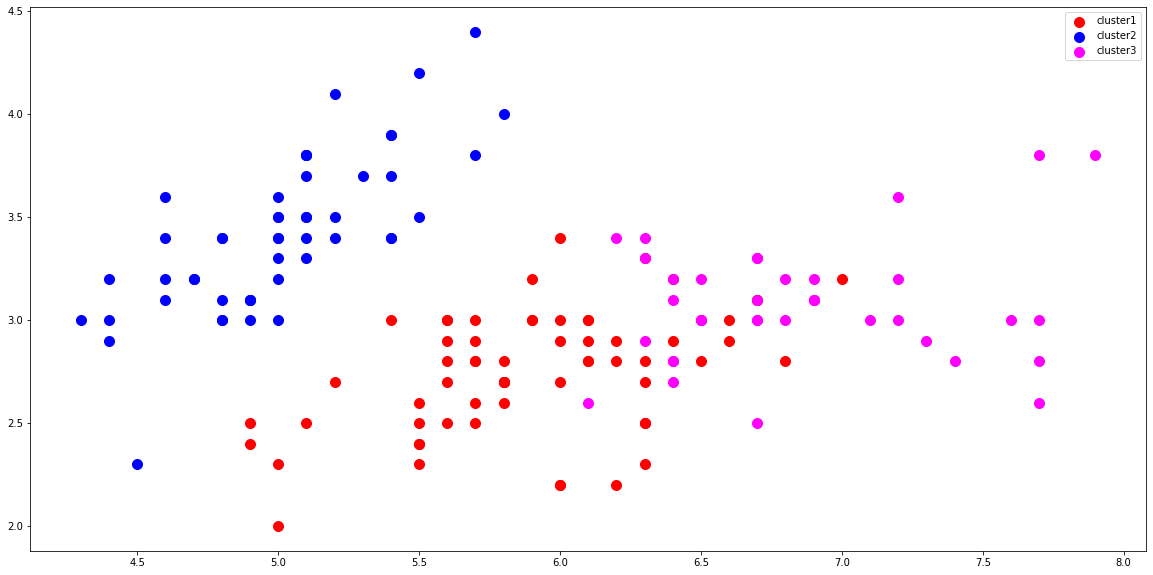

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='magenta',label='cluster3')


plt.legend()

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_, metric='euclidean')
score

0.5525919445499757

In [28]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.4,min_samples=4)
model.fit(X)

DBSCAN(eps=0.4, min_samples=4)

In [29]:
y_pred = model.fit_predict(X)

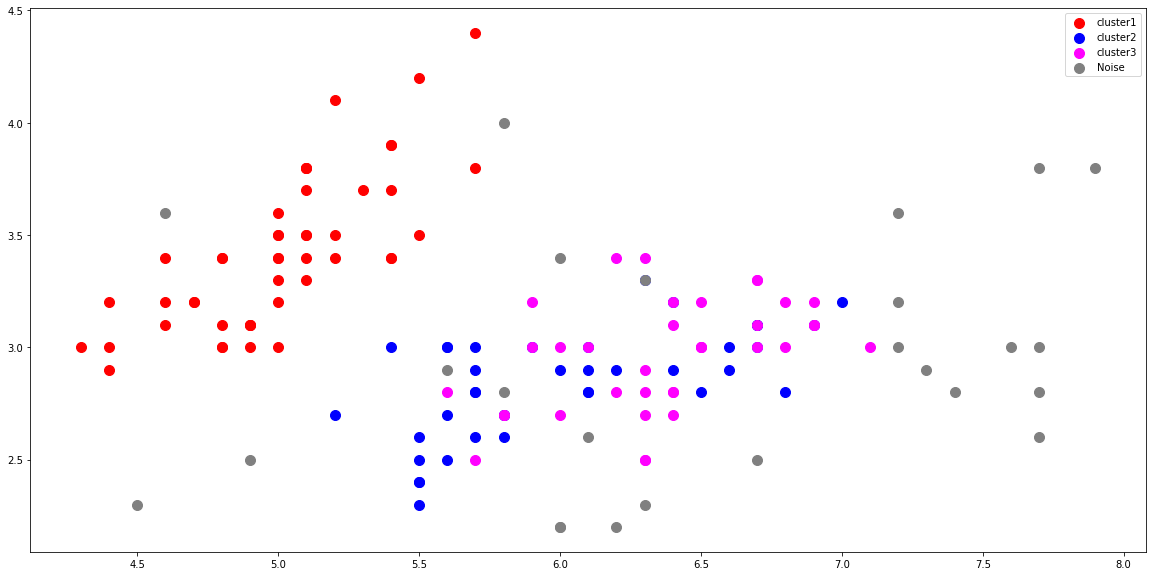

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='magenta',label='cluster3')

#noise
plt.scatter(X[y_pred==-1,0],X[y_pred==-1,1],s=100,c='gray',label='Noise')


plt.legend()

In [15]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, model.labels_, metric='euclidean')
score

0.32494128570401704